# Исследование объявлений о продаже квартир

![](https://upload.wikimedia.org/wikipedia/commons/7/75/How_does_real_estate_investment_work.jpg 'by: WilliamAyadi99')

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (15, 5)})

In [166]:
! gdown 1VbB-njRygJfP3XxfdpNqqmF-J0DdRJkj

Downloading...
From: https://drive.google.com/uc?id=1VbB-njRygJfP3XxfdpNqqmF-J0DdRJkj
To: /content/real_estate_data.csv
100% 3.21M/3.21M [00:00<00:00, 176MB/s]


In [167]:
df = pd.read_csv('/content/real_estate_data.csv', sep='\t')

In [168]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Описание данных:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Вывод

Загружен файл с данными. Видно, что в файле содержатся данные о 23699 квартирах. Также видно, что некоторые колонки содержат большое количество пропусков (например, колонка `is_apartment`). Некоторые колонки (например, `cityCenters_nearest`) названы не очень удачно, на этапе предобработки их нужно будет переименовать. Также видно, что типы данных в некоторых колнках определились не очень удачно, для наглядности их можно будет изменить (например, сменить тип данных колонки `floors_total` с _float64_ на _int64_).

## Предобработка данных

Проведём предобработку данных. Исправим недостатки, обнаруженные на предыдущем этапе, дополнительно пройдёмся по каждой колонке в отдельности и исправим возможные недочёты. Особое внимание следует уделить пропущенным данным.

### `total_images`

In [171]:
print('Тип данных:', df.total_images.dtype)
print('Уникальные значения:', df.total_images.unique())
print('Количество пропусков:', df.total_images.isna().sum())

Тип данных: int64
Уникальные значения: [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
Количество пропусков: 0


В данной колонке проблем не обнаружено.

### `last_price`

In [172]:
print('Тип данных:', df.last_price.dtype)
print('Количество пропусков:', df.last_price.isna().sum())

Тип данных: float64
Количество пропусков: 0


In [173]:
df.last_price.describe().to_frame()

,last_price
count,2.369900e+04
mean,6.541549e+06
std,1.088701e+07
min,1.219000e+04
25%,3.400000e+06
50%,4.650000e+06
75%,6.800000e+06
max,7.630000e+08


Видно, что медианное значение сильно отличается от среднего (почти на 2 миллиона). Это связано с наличием квартир с очень высокими ценами. Посмотрим на данные подробнее

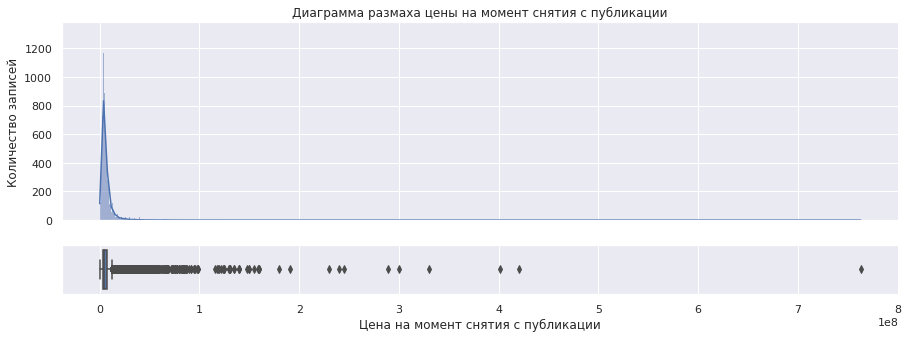

In [174]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='last_price', kde=True, ax=axs_hist)\
.set(title='Диаграмма размаха цены на момент снятия с публикации',
     ylabel='Количество записей')
sns.boxplot(data=df, x='last_price', ax=axs_box)\
.set(xlabel='Цена на момент снятия с публикации');

Видно, довольно много данных выходят за границу полутора межквартильных расстояний. Возможно это выбросы, ошибки в данных или просто очень элитное жильё. Будем учитывать это при дальнейшем анализе.

### `total_area`

In [175]:
print('Тип данных:', df.total_area.dtype)
print('Количество пропусков:', df.total_area.isna().sum())

Тип данных: float64
Количество пропусков: 0


In [176]:
df.total_area.describe().to_frame()

,total_area
count,23699.000000
mean,60.348651
std,35.654083
min,12.000000
25%,40.000000
50%,52.000000
75%,69.900000
max,900.000000


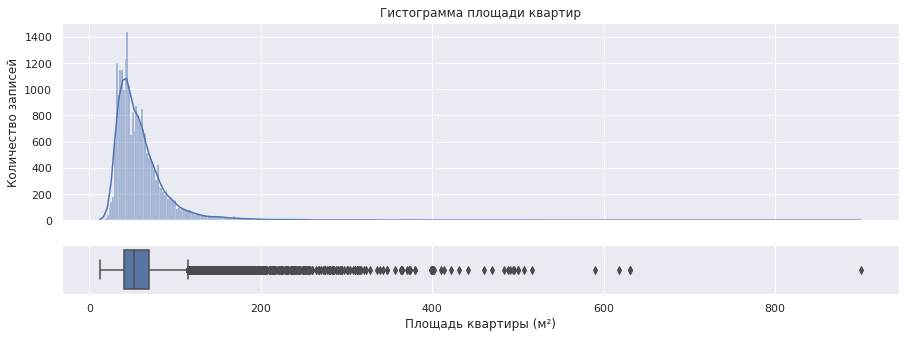

In [177]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='total_area', kde=True, ax=axs_hist)\
.set(title='Гистограмма площади квартир',
     ylabel='Количество записей')
sns.boxplot(data=df, x='total_area', ax=axs_box)\
.set(xlabel='Площадь квартиры (м²)');

Пропусков в данных нет, но в некоторых записях значения колонки подозрительно высокие. 

### `first_day_exposition`

In [178]:
print('Тип данных:', df.first_day_exposition.dtype)
print('Количество пропусков:', df.first_day_exposition.isna().sum())

Тип данных: object
Количество пропусков: 0


Пропусков не обнаружено, а тип данных следует изменить на _datetime_.

In [179]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверяем, что данные сконвертировались правильно и ничего не потерялось
df['first_day_exposition'].describe(datetime_is_numeric=True).to_frame()

,first_day_exposition
count,23699
mean,2017-11-08 21:55:18.975484160
min,2014-11-27 00:00:00
25%,2017-05-12 12:00:00
50%,2017-12-12 00:00:00
75%,2018-08-26 00:00:00
max,2019-05-03 00:00:00


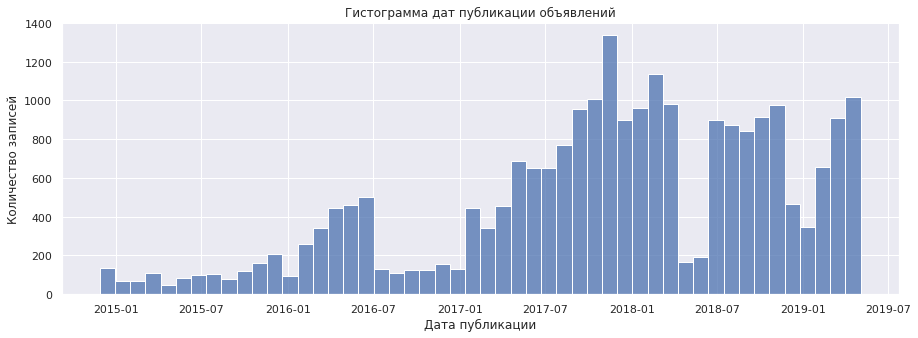

In [180]:
sns.histplot(data=df, x='first_day_exposition')\
.set(xlabel='Дата публикации',
     ylabel='Количество записей',
     title='Гистограмма дат публикации объявлений');

Данные преобразованы в формат _datetime_, что облегчит дальнейшую работу, пропусков данных не обнаружено, подозрительных выбросов не обнаружено.

### `rooms`

In [181]:
print('Тип данных:', df.rooms.dtype)
print('Количество пропусков:', df.rooms.isna().sum())

Тип данных: int64
Количество пропусков: 0


In [182]:
df.rooms.describe().to_frame()

,rooms
count,23699.000000
mean,2.070636
std,1.078405
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


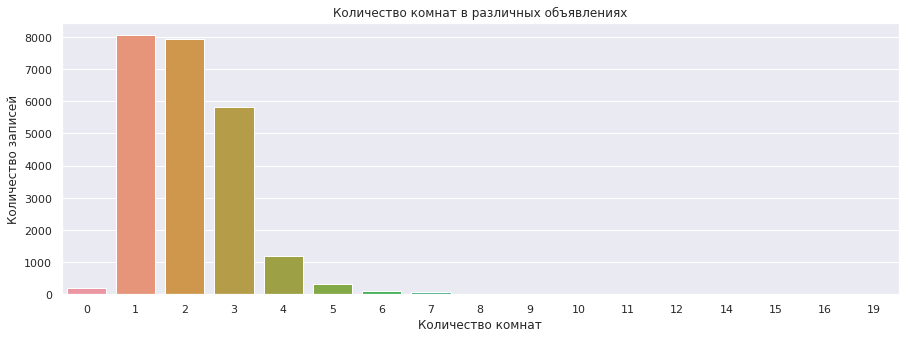

In [183]:
sns.countplot(data=df, x='rooms')\
.set(xlabel='Количество комнат',
     ylabel='Количество записей',
     title='Количество комнат в различных объявлениях');

Пропусков данных не обнаружено, тип данных менять не пришлось, большинство квартир имеет до 4 комнат, есть несколько квартир с большим (до 19) количеством комнат. Возможно, появление записей с аномально большим количеством комнат связано с опечатками при заполнении объявлений.

### `ceiling_height`

In [184]:
print('Тип данных:', df.ceiling_height.dtype)
print('Количество пропусков:', df.ceiling_height.isna().sum())

Тип данных: float64
Количество пропусков: 9195


In [185]:
df.ceiling_height.describe().to_frame()

,ceiling_height
count,14504.000000
mean,2.771499
std,1.261056
min,1.000000
25%,2.520000
50%,2.650000
75%,2.800000
max,100.000000


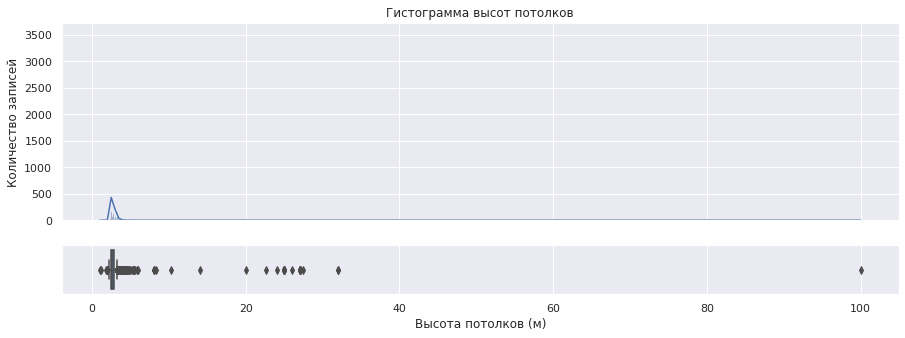

In [186]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='ceiling_height', kde=True, ax=axs_hist)\
.set(title='Гистограмма высот потолков',
     ylabel='Количество записей')
sns.boxplot(data=df, x='ceiling_height', ax=axs_box)\
.set(xlabel='Высота потолков (м)');

In [187]:
# заполняем пропуски мединным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
# контроль
print('Количество пропусков:', df.ceiling_height.isna().sum())

Количество пропусков: 0


Видно, что в данных есть пропуски. Это можно объяснить тем, что владельцы могли не знать точную высоту потолка. В данном случае пропуски вполне можно заполнить медианным значением (2,65 м).
В данных также есть записи с аномально низкими и аномально высокими значениями.

Высота потолка более 4 метров и менее 2 метров выглядит неправдоподобно. Следует учесть это при дальнейшей работе с данными.

### `floors_total`

In [188]:
print('Тип данных:', df.floors_total.dtype)
print('Количество пропусков:', df.floors_total.isna().sum())

Тип данных: float64
Количество пропусков: 86


In [189]:
df.floors_total.describe().to_frame()

,floors_total
count,23613.000000
mean,10.673824
std,6.597173
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,60.000000


In [190]:
# заполняем пропуски медианой
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
df['floors_total'] = df['floors_total'].astype(int)
# контроль
print('Тип данных:', df.floors_total.dtype)
print('Количество пропусков:', df.floors_total.isna().sum())
# проверяем, не получилось ли так, что количество этажей меньше, чем этаж квартиры
print('Количество записей, где количество этажей меньше, чем этаж квартиры: ', end='')
print(df[df['floors_total'] < df['floor']].loc[:,'floors_total'].count())
df.loc[df['floors_total'] < df['floor'], 'floors_total'] = df.loc[df['floors_total'] < df['floor'], 'floor']
print('Количество записей, где количество этажей меньше, чем этаж квартиры: ', end='')
print(df[df['floors_total'] < df['floor']].loc[:,'floors_total'].count())

Тип данных: int64
Количество пропусков: 0
Количество записей, где количество этажей меньше, чем этаж квартиры: 37
Количество записей, где количество этажей меньше, чем этаж квартиры: 0


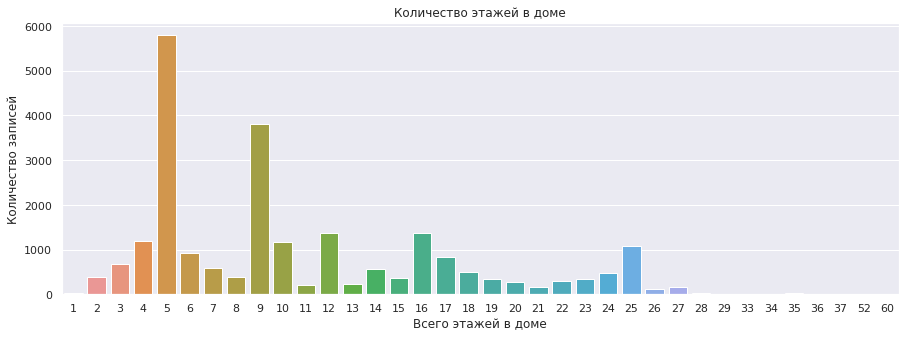

In [191]:
sns.countplot(data=df, x='floors_total')\
.set(xlabel='Всего этажей в доме',
     ylabel='Количество записей',
     title='Количество этажей в доме');

В данных было обнаружено 86 пропусков, которые были заменены медианным значением (9 этажей). Пропуски могли возникнуть либо в результате технической ошибки, либо собственники могли забыть заполнить соответствующие поля. Подозрительных значений не обнаружено.

### `living_area`

In [192]:
print('Тип данных:', df.living_area.dtype)
print('Количество пропусков:', df.living_area.isna().sum())

Тип данных: float64
Количество пропусков: 1903


In [193]:
df.living_area.describe().to_frame()

,living_area
count,21796.000000
mean,34.457852
std,22.030445
min,2.000000
25%,18.600000
50%,30.000000
75%,42.300000
max,409.700000


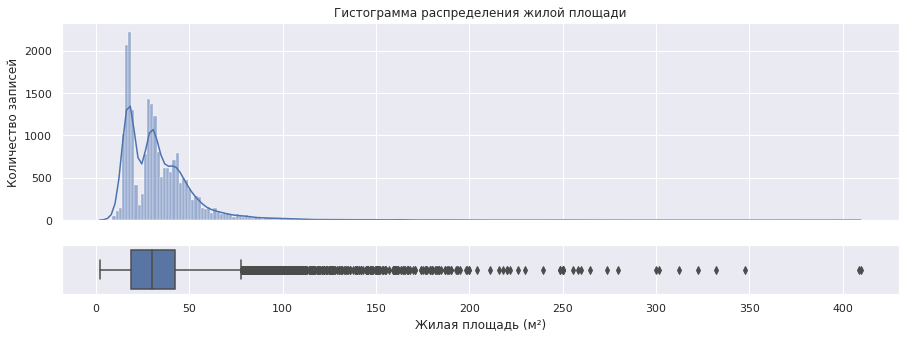

In [194]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='living_area', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения жилой площади',
     ylabel='Количество записей')
sns.boxplot(data=df, x='living_area', ax=axs_box)\
.set(xlabel='Жилая площадь (м²)');

In [195]:
print('Количество записей до удаления пропущенных данных:', df.shape)
df = df.dropna(subset=['living_area'])
# контроль
print('Количество записей после удаления пропущенных данных:', df.shape)
print('Количество пропусков в колонке living_area:', df.living_area.isna().sum())

Количество записей до удаления пропущенных данных: (23699, 22)
Количество записей после удаления пропущенных данных: (21796, 22)
Количество пропусков в колонке living_area: 0


В данных обнаружено 1903 пропуска. Данный параметр довольно важен, а количество записей с пропусками относительно невелико. Заполнение пропусков медианным значением или каким-либо ещё может привести к искажению результатов исследования, поэтому данные с пропусками были удалены из таблицы. Также обнаружено много записей с подозрительно высокими и низкими значениями, о чём следует сообщить заказчику исследования.

### `floor`

In [196]:
print('Тип данных:', df.floor.dtype)
print('Количество пропусков:', df.floor.isna().sum())

Тип данных: int64
Количество пропусков: 0


In [197]:
df.floor.describe().to_frame()

,floor
count,21796.000000
mean,5.890117
std,4.868766
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,33.000000


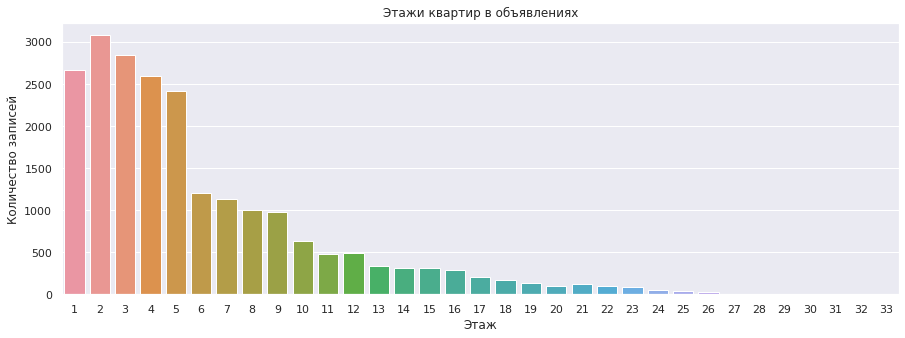

In [198]:
sns.countplot(data=df, x='floor')\
.set(xlabel='Этаж',
     ylabel='Количество записей',
     title='Этажи квартир в объявлениях');

Пропусков данных не обнаружено, тип данных выбран правильно, аномально высоких или низких данных нет. Колонка прекрасна!

### `is_apartment`

In [199]:
print('Тип данных:', df.is_apartment.dtype)
print('Количество пропусков:', df.is_apartment.isna().sum())

Тип данных: object
Количество пропусков: 19141


In [200]:
df.is_apartment.value_counts().to_frame()

,is_apartment
False,2613
True,42


In [201]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)
# контроль
print('Количество пропусков:', df.is_apartment.isna().sum())
print('Тип данных:', df.is_apartment.dtype)

Количество пропусков: 0
Тип данных: bool


В данных очень много пропусков, следует об этом сообщить заказчику. Возможно, пропуски возникли из-за того, что авторы объявлений не указывали этот параметр при заполнении форм. Так как для дальнейших расчётов нам эта колонка не понадобится, можно пока заполнить пропуски значением _False_.

### `studio`

In [202]:
print('Тип данных:', df.studio.dtype)
print('Количество пропусков:', df.studio.isna().sum())

Тип данных: bool
Количество пропусков: 0


In [203]:
df.studio.value_counts().to_frame()

,studio
False,21657
True,139


Прекрасная колонка, пропусков данных нет, тип данных корректен.

### `open_plan`

In [204]:
print('Тип данных:', df.open_plan.dtype)
print('Количество пропусков:', df.open_plan.isna().sum())

Тип данных: bool
Количество пропусков: 0


In [205]:
df.open_plan.value_counts().to_frame()

,open_plan
False,21734
True,62


Снова прекрасная колонка без пропусков. Душа радуется.

### `kitchen_area`

In [206]:
print('Тип данных:', df.kitchen_area.dtype)
print('Количество пропусков:', df.kitchen_area.isna().sum())

Тип данных: float64
Количество пропусков: 814


In [207]:
df.kitchen_area.describe().to_frame()

,kitchen_area
count,20982.000000
mean,10.516987
std,5.843371
min,1.300000
25%,7.000000
50%,9.000000
75%,12.000000
max,112.000000


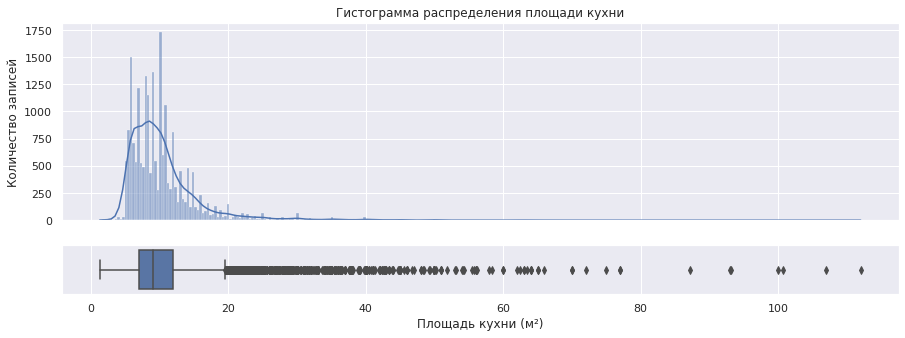

In [208]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='kitchen_area', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения площади кухни',
     ylabel='Количество записей')
sns.boxplot(data=df, x='kitchen_area', ax=axs_box)\
.set(xlabel='Площадь кухни (м²)');

In [209]:
df[df['kitchen_area'].isna()]['studio'].value_counts()

False    675
True     139
Name: studio, dtype: int64

In [210]:
df[df['kitchen_area'].isna()]['open_plan'].value_counts()

False    752
True      62
Name: open_plan, dtype: int64

Обнаружено довольно много подозрительных выбросов данных.

Обнаружено несколько пропусков. Это подозрительно, так как параметр довольно важен для определения цены квартиры. Первоначальная гипотеза, что пропуски данных допущены в квартирах-студиях, либо квартирах с открытой планировкой не подтвердилась. Пропуски в данных могли возникнуть по техническим причинам. Об этом следует сообщить заказчику исследования. Заполнять пропуски в данном случае будет неправильным, так как эти значения в дальнейшем могут исказить результаты исследования. Так как количество данных с пропусками относительно невелико, принято решение отказаться от их анализа и удалить записи с пропусками из данных.

In [211]:
print('Количество записей до удаления пропущенных данных:', df.shape)
df = df.dropna(subset=['kitchen_area'])
# контроль
print('Количество записей после удаления пропущенных данных:', df.shape)
print('Количество пропусков в колонке kitchen_area:', df.kitchen_area.isna().sum())

Количество записей до удаления пропущенных данных: (21796, 22)
Количество записей после удаления пропущенных данных: (20982, 22)
Количество пропусков в колонке kitchen_area: 0


### balcony

In [212]:
print('Тип данных:', df.balcony.dtype)
print('Количество пропусков:', df.balcony.isna().sum())

Тип данных: float64
Количество пропусков: 9764


In [213]:
df.balcony.describe().to_frame()

,balcony
count,11218.000000
mean,1.156623
std,1.065971
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [214]:
t = df.loc[:,'balcony'].fillna(0).copy()
df.loc[:,'balcony'] = t
# контроль
print('Количество пропусков:', df.balcony.isna().sum())

Количество пропусков: 0


In [215]:
df.loc[:,'balcony'] = df.loc[:,'balcony'].astype('int')

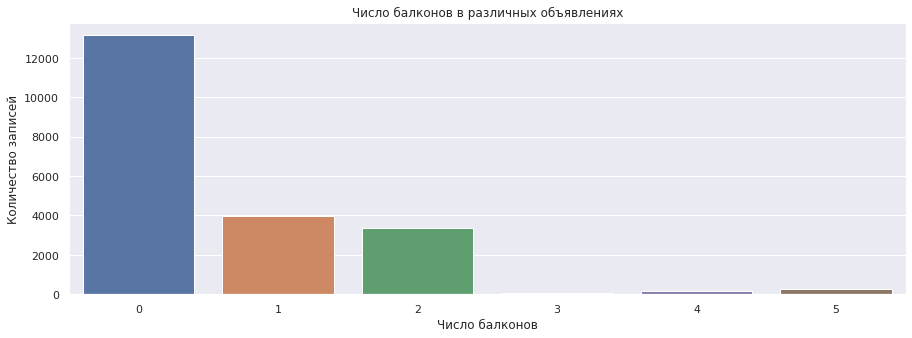

In [216]:
sns.countplot(data=df, x='balcony')\
.set(xlabel='Число балконов',
     ylabel='Количество записей',
     title='Число балконов в различных объявлениях');

В данных было обнаружено довольно много (почти 10000) пропусков. Можно предположить, что они возникли из-за того, что собственники квартир без балконов просто не заполняли это поле. Поэтому заполним пропуски данных значением 0. Наблюдается несколько (568) записей о квартирах с тремя и более балконами. Выглядит подозрительно, но таких записей довольно мало, поэтому оставим их без изменений.

### `locality_name`

In [217]:
print('Тип данных:', df.locality_name.dtype)
print('Количество пропусков:', df.locality_name.isna().sum())

Тип данных: object
Количество пропусков: 39


In [218]:
df.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

In [219]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=False)

In [220]:
df.locality_name.value_counts().to_frame().head()

,locality_name
Санкт-Петербург,14071
поселок Мурино,430
поселок Шушары,393
Всеволожск,357
Пушкин,337


In [221]:
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')
# контроль
print('Количество пропусков:', df.locality_name.isna().sum())

Количество пропусков: 0


Выявлено незначительное количество пропусков данных. Возможно жители Санкт-Петербурга считали лишним указывать город. Заменим пропуски наиболее часто встречающимся занчением ("Санкт-Петербург"). Было выявлено несколько неявных дупликатов данных из-за использования буквы "ё", которые были исправлены.

### `airports_nearest`

In [222]:
print('Тип данных:', df.airports_nearest.dtype)
print('Количество пропусков:', df.airports_nearest.isna().sum())

Тип данных: float64
Количество пропусков: 4674


In [223]:
df.airports_nearest.describe().to_frame()

,airports_nearest
count,16308.000000
mean,28773.990925
std,12642.885702
min,0.000000
25%,18539.000000
50%,26679.000000
75%,37199.000000
max,84869.000000


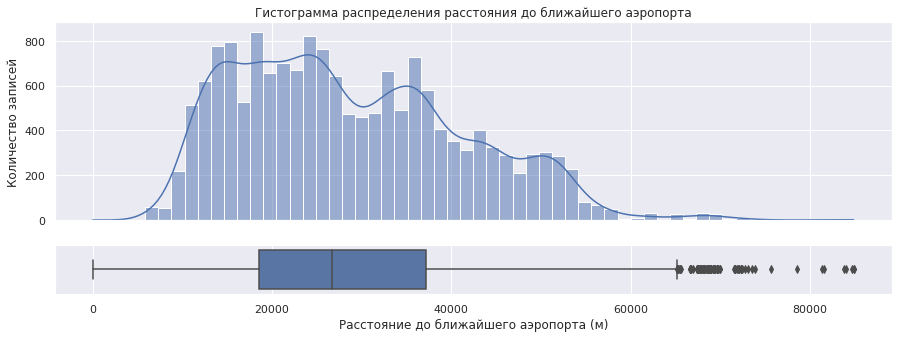

In [224]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='airports_nearest', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения расстояния до ближайшего аэропорта',
     ylabel='Количество записей')
sns.boxplot(data=df, x='airports_nearest', ax=axs_box)\
.set(xlabel='Расстояние до ближайшего аэропорта (м)');

In [225]:
df[df['airports_nearest'] == 0]['airports_nearest'].count()

1

Обнаружено довольно много записей с пропущенными данными. Так как данная колонка заполнялась автоматически, пропуски данных скорее всего связаны с технической ошибкой. Заполнять их не стоит, о них требуется сообщить коллегам, занимающимся выгрузкой данных. Также обнаружена одна запись со значением 0 и несколько записей с подозрительно высокими значениями. О них тоже следует сообщить.

### `cityCenters_nearest`

In [226]:
print('Тип данных:', df.cityCenters_nearest.dtype)
print('Количество пропусков:', df.cityCenters_nearest.isna().sum())

Тип данных: float64
Количество пропусков: 4653


In [227]:
df.cityCenters_nearest.describe().to_frame()

,cityCenters_nearest
count,16329.000000
mean,14236.307551
std,8662.711834
min,181.000000
25%,9324.000000
50%,13107.000000
75%,16267.000000
max,65968.000000


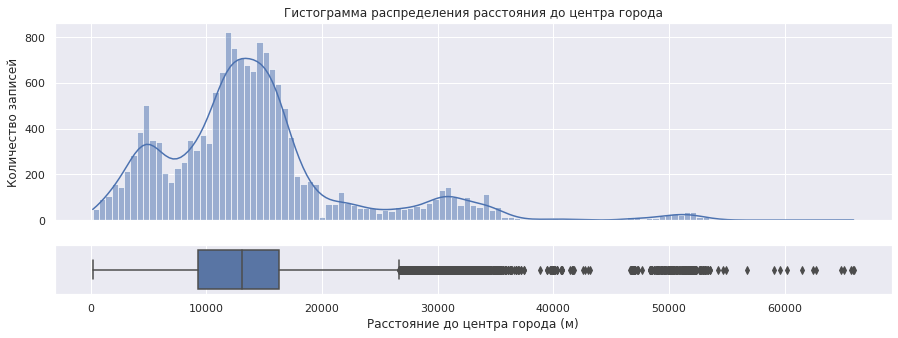

In [228]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='cityCenters_nearest', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения расстояния до центра города',
     ylabel='Количество записей')
sns.boxplot(data=df, x='cityCenters_nearest', ax=axs_box)\
.set(xlabel='Расстояние до центра города (м)');

In [229]:
df = df.rename({'cityCenters_nearest': 'city_center_nearest'}, axis=1)
# контроль
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Обнаружены аналогичные проблемы, как со столбцом `airports_nearest`. Требуются аналогичные действия. Дополнительно колонка была переименована для аккуратности.

### `parks_around3000`

In [230]:
print('Тип данных:', df.parks_around3000.dtype)
print('Количество пропусков:', df.parks_around3000.isna().sum())

Тип данных: float64
Количество пропусков: 4652


In [231]:
df.parks_around3000.describe().to_frame()

,parks_around3000
count,16330.000000
mean,0.611451
std,0.801266
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [232]:
df = df.rename({'parks_around3000': 'parks_around_3000'}, axis=1)
# контроль
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [233]:
df['parks_around_3000'] = df['parks_around_3000'].astype('Int64', errors='ignore')
# контроль
print('Тип данных:', df.parks_around_3000.dtype)

Тип данных: Int64


Обнаружены аналогичные проблемы, как с предыдущими столбцами. Требуются аналогичные действия. Пропуски данных оставлены без изменений. Дополнительно колонка была переименована для аккуратности, а тип данных переведён в Int64 (целочисленный тип данных лучше подходит для числа парков).

### `parks_nearest`

In [234]:
print('Тип данных:', df.parks_nearest.dtype)
print('Количество пропусков:', df.parks_nearest.isna().sum())

Тип данных: float64
Количество пропусков: 13716


In [235]:
df.parks_nearest.describe().to_frame()

,parks_nearest
count,7266.000000
mean,487.838701
std,337.388649
min,1.000000
25%,287.250000
50%,453.500000
75%,610.750000
max,3190.000000


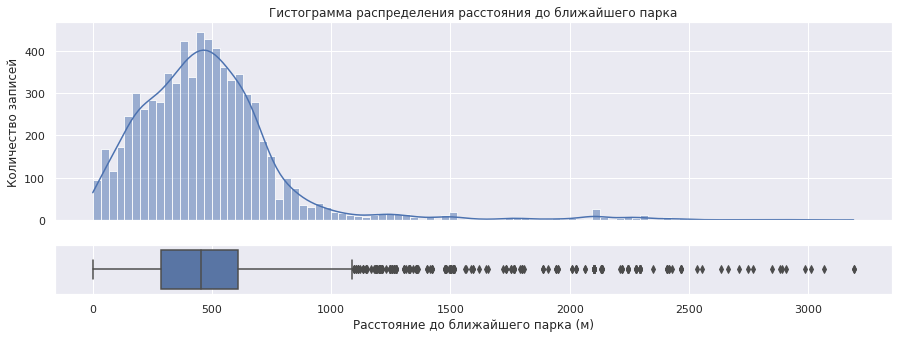

In [236]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='parks_nearest', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения расстояния до ближайшего парка',
     ylabel='Количество записей')
sns.boxplot(data=df, x='parks_nearest', ax=axs_box)\
.set(xlabel='Расстояние до ближайшего парка (м)');

В данном случае у нас слишком много пропусков данных. Следует сообщить о проблеме, а пока этот столбец в анализе не использовать.

### `ponds_around3000`

In [237]:
print('Тип данных:', df.ponds_around3000.dtype)
print('Количество пропусков:', df.ponds_around3000.isna().sum())

Тип данных: float64
Количество пропусков: 4652


In [238]:
df.ponds_around3000.describe().to_frame()

,ponds_around3000
count,16330.000000
mean,0.763748
std,0.937921
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [239]:
df = df.rename({'ponds_around3000': 'ponds_around_3000'}, axis=1)
# контроль
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [240]:
df['ponds_around_3000'] = df['ponds_around_3000'].astype('Int64', errors='ignore')
# контроль
print('Тип данных:', df.ponds_around_3000.dtype)

Тип данных: Int64


Колонка была обработана аналогично колонке _parks_around3000_. Пропуски данных оставляем, колонку переименовываем, тип данных меняем на целочисленный.

### `ponds_nearest`

In [241]:
print('Тип данных:', df.ponds_nearest.dtype)
print('Количество пропусков:', df.ponds_nearest.isna().sum())

Тип данных: float64
Количество пропусков: 12882


In [242]:
df.ponds_nearest.describe().to_frame()

,ponds_nearest
count,8100.000000
mean,519.422963
std,277.396212
min,13.000000
25%,295.000000
50%,503.000000
75%,732.000000
max,1344.000000


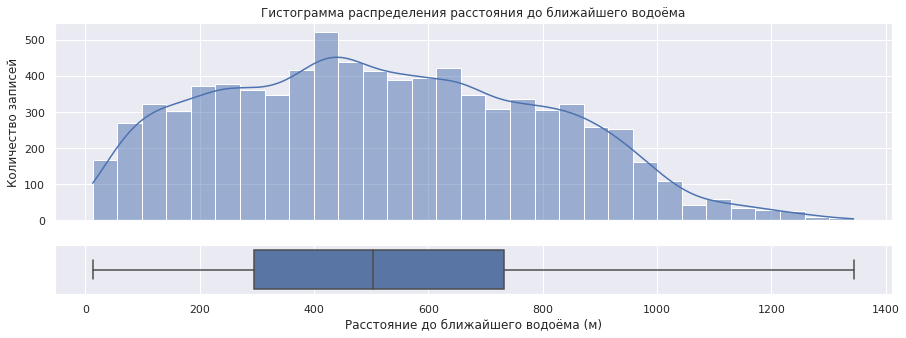

In [243]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='ponds_nearest', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения расстояния до ближайшего водоёма',
     ylabel='Количество записей')
sns.boxplot(data=df, x='ponds_nearest', ax=axs_box)\
.set(xlabel='Расстояние до ближайшего водоёма (м)');

В данном случае у нас слишком много пропусков данных. Следует сообщить о проблеме, а пока этот столбец в анализе не использовать.

### `days_exposition`

In [244]:
print('Тип данных:', df.days_exposition.dtype)
print('Количество пропусков:', df.days_exposition.isna().sum())

Тип данных: float64
Количество пропусков: 2891


In [245]:
df.days_exposition.describe()

count    18091.000000
mean       185.665137
std        221.968080
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

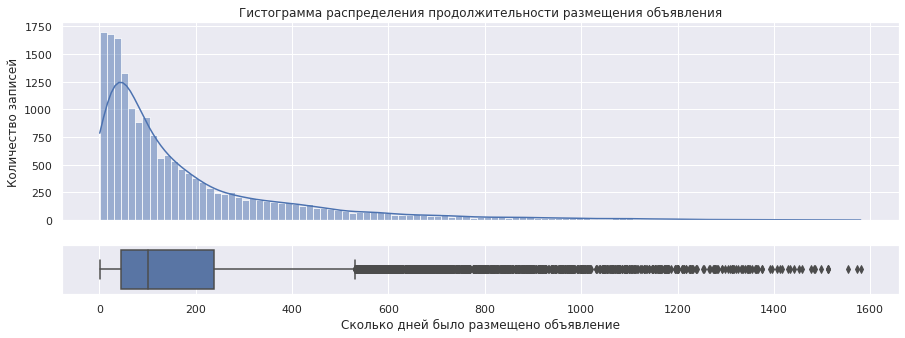

In [246]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='days_exposition', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения продолжительности размещения объявления',
     ylabel='Количество записей')
sns.boxplot(data=df, x='days_exposition', ax=axs_box)\
.set(xlabel='Cколько дней было размещено объявление');

В данном случае мы обнаружили более 3000 пропусков данных. Так как данная колонка скорее всего заполнялась автоматически, то причиной пропусков могла стать техническая ошибка, о чём следует сообщить. 

### Обработка дупликатов

In [247]:
df.duplicated().sum()

0

Явных дупликатов в данных не обнаружено

### Итог
В результате предобработки данных было выявлено несколько столбцов с пропусками в данных. В некоторых случаях пропуски были заменены на подходящие по смыслу значения. В некоторых случаях пропуски были оставлены, так как скорее всего возникли по техническим причинам и их замена привела бы к сокрытию возможной проблемы. Данные с пропусками в некоторых колонках были удалены, так как их использование могло бы исказить результаты анализа. Явных дупликатов в данных не обнаружено.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу несколько вспомогательных колонок.

### Определение цены квадратного метра
Для определения цены квардратного метра необходимо разделить занчение `last_price` (цена на момент снятия с публикации) на `total_area` (площадь квартиры в квадратных метрах).

In [248]:
df['sq_meter_price'] = df['last_price'] / df['total_area']

In [249]:
# контроль
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,городской поселок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55.0,95065.789474


In [250]:
df['sq_meter_price'].describe().to_frame()

,sq_meter_price
count,2.098200e+04
mean,9.920313e+04
std,4.808107e+04
min,1.118349e+02
25%,7.692308e+04
50%,9.493671e+04
75%,1.137725e+05
max,1.736842e+06


### Определение дня недели, месяца и года публикации объявления

Добавим в таблицу колонки с днём недели, месяцем и годом публикации объявления. Дни недели начинаются с понедельника и обозначаются порядковыми номерами (начиная с нуля).

In [251]:
df['weekday'] = df['first_day_exposition'].dt.day_of_week
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,<NA>,NaN,<NA>,NaN,55.0,95065.789474,0,9,2018


### Добавление категорий по этажу квартиры
Отнесём все квартиры к трём категориям по этажу: первый, последний, другой.

In [252]:
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_category'] = df.apply(floor_cat, axis=1)
# контроль
df.head()
df['floor_category'].value_counts()

другой       15404
последний     3018
первый        2560
Name: floor_category, dtype: int64

### Определение соотношения жилой и общей площади

Для определения соотношения жилой и общей площади разделим значения колонки `living_area` на значения колонки `total_area`. Следует помнить, что на этапе предобработки мы выявили довольно много подозрительно высоких значений в данных колонках. Результат сохраним в новой колонке `living_to_total_rate`.

In [253]:
df['living_to_total_rate'] = df['living_area'] / df['total_area']
# контроль
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_category,living_to_total_rate
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,<NA>,NaN,55.0,95065.789474,0,9,2018,другой,0.473684


In [254]:
df['living_to_total_rate'].describe().to_frame()

,living_to_total_rate
count,20982.000000
mean,0.562528
std,0.103586
min,0.021583
25%,0.493344
50%,0.566456
75%,0.635294
max,0.975754


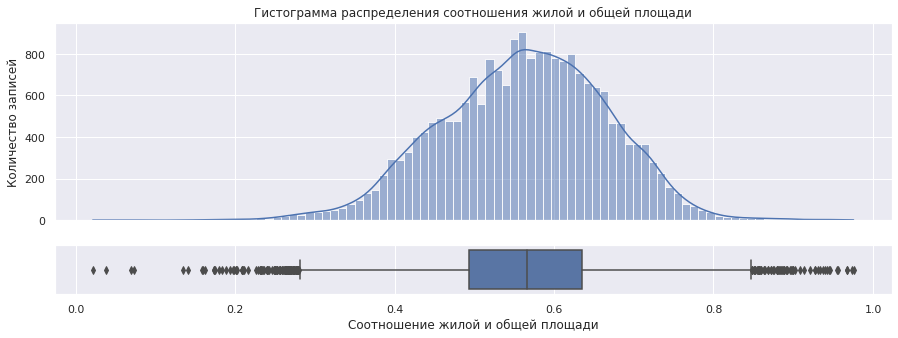

In [255]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='living_to_total_rate', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения соотношения жилой и общей площади',
     ylabel='Количество записей')
sns.boxplot(data=df, x='living_to_total_rate', ax=axs_box)\
.set(xlabel='Соотношение жилой и общей площади');

### Определение соотношения площади кухни и общей площади

Для определения соотношения площади кухни и общей площади разделим значения колонки _kitchen_area_ на значения колонки _total_area_. Следует помнить, что на этапе предобработки мы выявили довольно много подозрительно высоких значений в данных колонках. Результат сохраним в колонке _kitchen_to_total_rate_.

In [256]:
df['kitchen_to_total_rate'] = df['kitchen_area'] / df['total_area']
# контроль
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_category,living_to_total_rate,kitchen_to_total_rate
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,<NA>,NaN,55.0,95065.789474,0,9,2018,другой,0.473684,0.299342


In [257]:
df['kitchen_to_total_rate'].describe().to_frame()

,kitchen_to_total_rate
count,20982.000000
mean,0.186967
std,0.072589
min,0.025381
25%,0.133333
50%,0.171875
75%,0.231065
max,0.787879


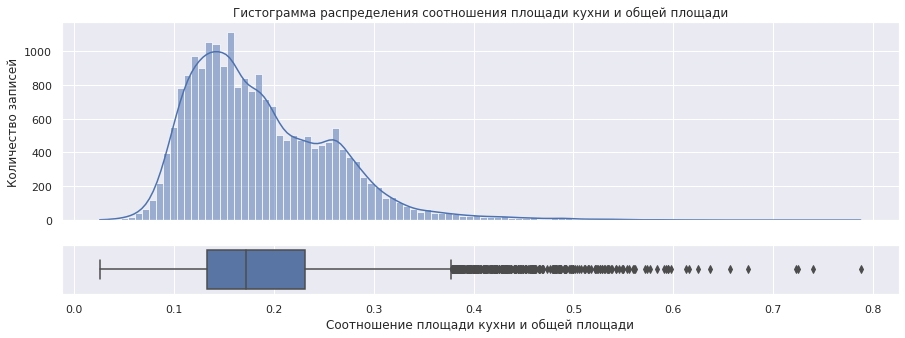

In [258]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='kitchen_to_total_rate', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения соотношения площади кухни и общей площади',
     ylabel='Количество записей')
sns.boxplot(data=df, x='kitchen_to_total_rate', ax=axs_box)\
.set(xlabel='Cоотношение площади кухни и общей площади');

### Итог
В таблицу были добавлены вспомогательные колонки, которые пригодятся для дальнейшего анализа. В ряде колонок наблюдаются значительные выбросы значений, которые будут устранены на этапе исследовательского анализа данных.

## Исследовательский анализ данных

### Исследование параметров: площадь, цена, число комнат, высота потолков

Изучим характеристики наборов данных по площади, цене, количеству комнат и высоте потолков.

#### Площадь

In [259]:
df[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,20982.000000,20982.000000,20982.000000
mean,60.547304,34.644380,10.516987
std,34.497775,21.916891,5.843371
min,14.000000,2.000000,1.300000
25%,40.500000,18.800000,7.000000
50%,52.205000,30.100000,9.000000
75%,70.000000,42.547500,12.000000
max,900.000000,409.700000,112.000000


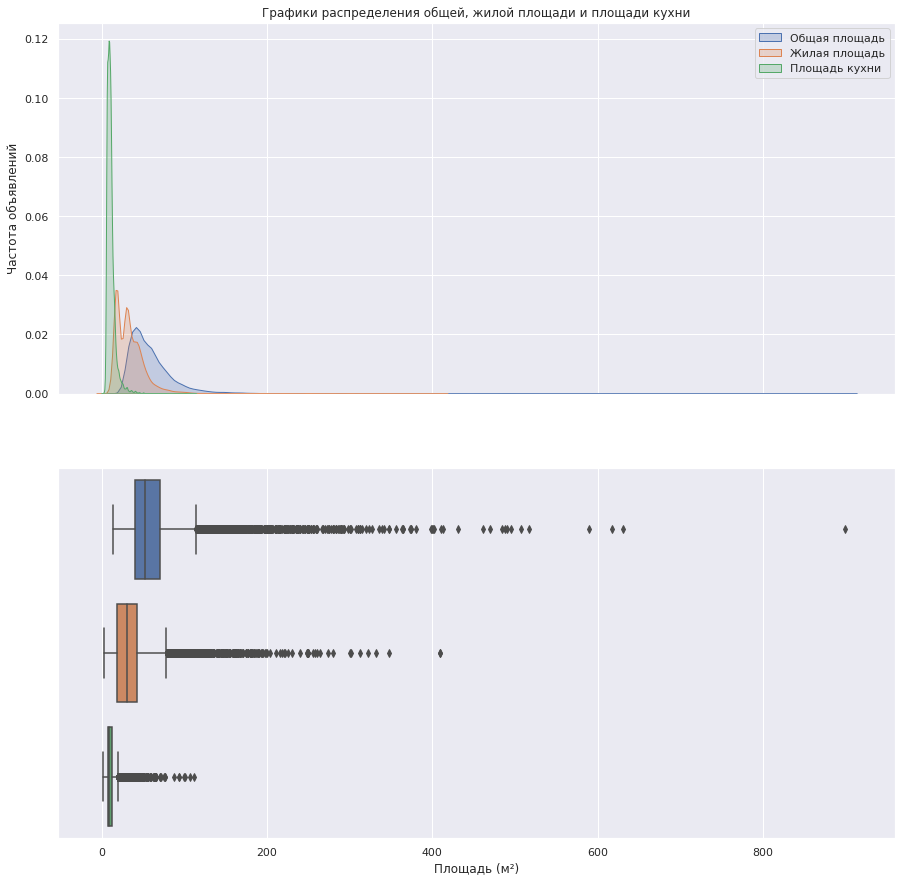

In [260]:
f, [axs_kde, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 15), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[1,1]))

sns.kdeplot(data=df, x='total_area', shade=True, ax=axs_kde)
sns.kdeplot(data=df, x='living_area', shade=True, ax=axs_kde)
kde = sns.kdeplot(data=df, x='kitchen_area', shade=True, ax=axs_kde)
kde.set(title='Графики распределения общей, жилой площади и площади кухни',
     ylabel='Частота объявлений')

kde.legend(labels=['Общая площадь','Жилая площадь', 'Площадь кухни'])

bp = sns.boxplot(data=df[['total_area',
                     'living_area',
                     'kitchen_area']], orient='h', ax=axs_box)

bp.set(xlabel='Площадь (м²)')
bp.set_yticklabels([])

plt.show()

Из построенных графиков видно, что среди значений общей площади, жилой площади и площади кухни наблюдается большое количество выбросов, которые будут обработаны на одном из следующих этапах исследования.

#### Цена

In [261]:
df['last_price'].describe().to_frame()

,last_price
count,2.098200e+04
mean,6.506827e+06
std,9.592656e+06
min,1.219000e+04
25%,3.500000e+06
50%,4.700000e+06
75%,6.800000e+06
max,4.200000e+08


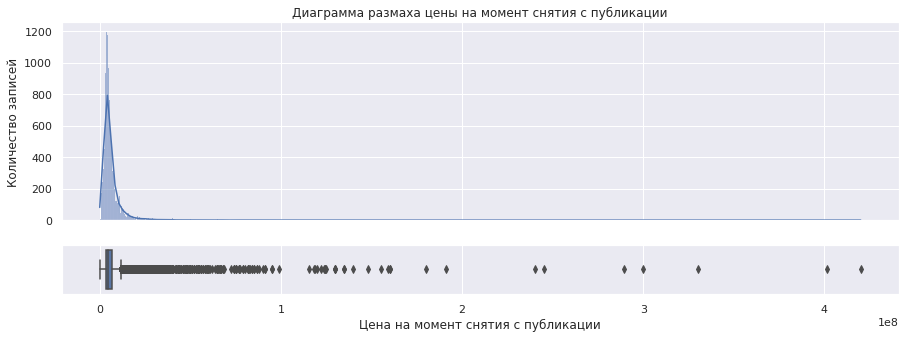

In [262]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='last_price', kde=True, ax=axs_hist)\
.set(title='Диаграмма размаха цены на момент снятия с публикации',
     ylabel='Количество записей')
sns.boxplot(data=df, x='last_price', ax=axs_box)\
.set(xlabel='Цена на момент снятия с публикации');

В колонке с ценой на момент снятия с публикации также наблюдается большое количество выбросов.

#### Число комнат

In [263]:
df['rooms'].describe().to_frame()

,rooms
count,20982.000000
mean,2.096035
std,1.064559
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


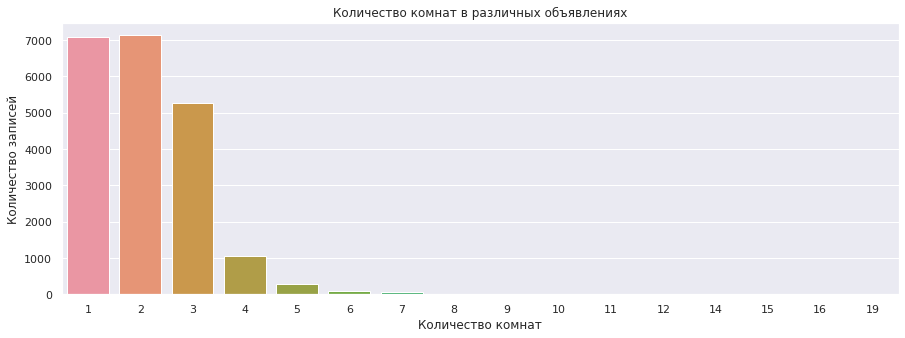

In [264]:
sns.countplot(data=df, x='rooms')\
.set(xlabel='Количество комнат',
     ylabel='Количество записей',
     title='Количество комнат в различных объявлениях');

Наблюдается несколько записей с аномально большим числом комнат.

#### Высота потолков

In [265]:
df['ceiling_height'].describe().to_frame()

,ceiling_height
count,20982.00000
mean,2.72315
std,0.99492
min,1.00000
25%,2.60000
50%,2.65000
75%,2.70000
max,100.00000


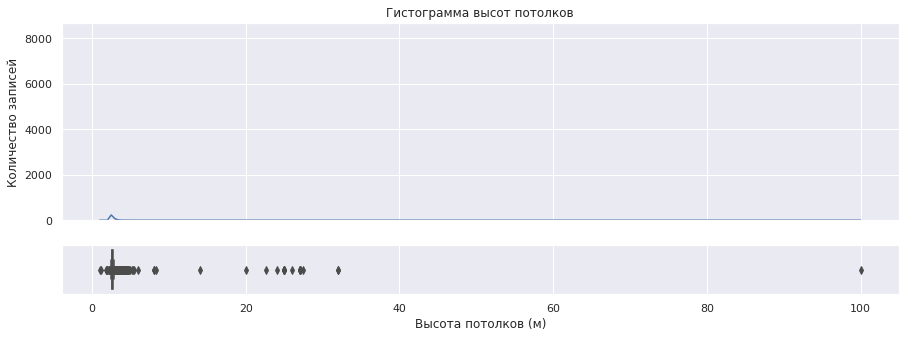

In [266]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='ceiling_height', kde=True, ax=axs_hist)\
.set(title='Гистограмма высот потолков',
     ylabel='Количество записей')
sns.boxplot(data=df, x='ceiling_height', ax=axs_box)\
.set(xlabel='Высота потолков (м)');

Наблюдается несколько записей с аномально высокими значениями в колонке с высотой потолка.

### Исследование времени продажи квартиры

In [267]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,18091.000000
mean,185.665137
std,221.968080
min,1.000000
25%,45.000000
50%,102.000000
75%,239.000000
max,1580.000000


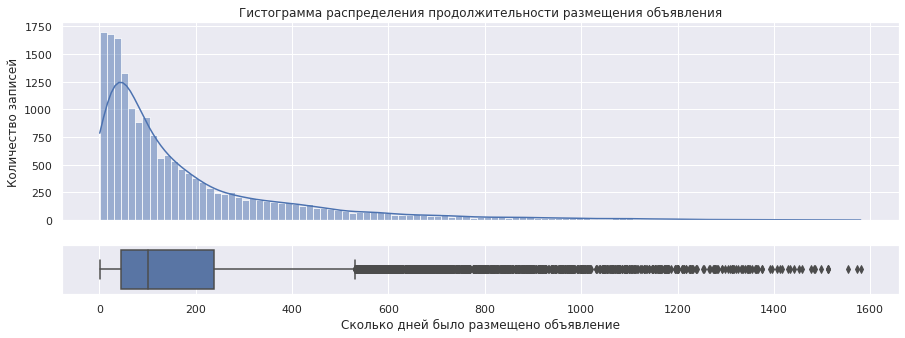

In [268]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='days_exposition', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения продолжительности размещения объявления',
     ylabel='Количество записей')
sns.boxplot(data=df, x='days_exposition', ax=axs_box)\
.set(xlabel='Cколько дней было размещено объявление');

In [269]:
print('Среднее время продажи квартиры:', round(df['days_exposition'].mean(), 2))
print('Медианное время продажи квартиры:', df['days_exposition'].median())

Среднее время продажи квартиры: 185.67
Медианное время продажи квартиры: 102.0


Обычно продажа квартиры занимает более 100 дней. Можно утверждать, что квартира была продана необычно быстро, если продажа заняла менее 45 дней. Если же продажа заняла более 240 дней, то можно утверждать, что квартира продавалась необычно долго.

### Удаление редких и выбивающихся значений

Рассмотрим матрицу зависимостей наиболее интересных для исследования параметров.

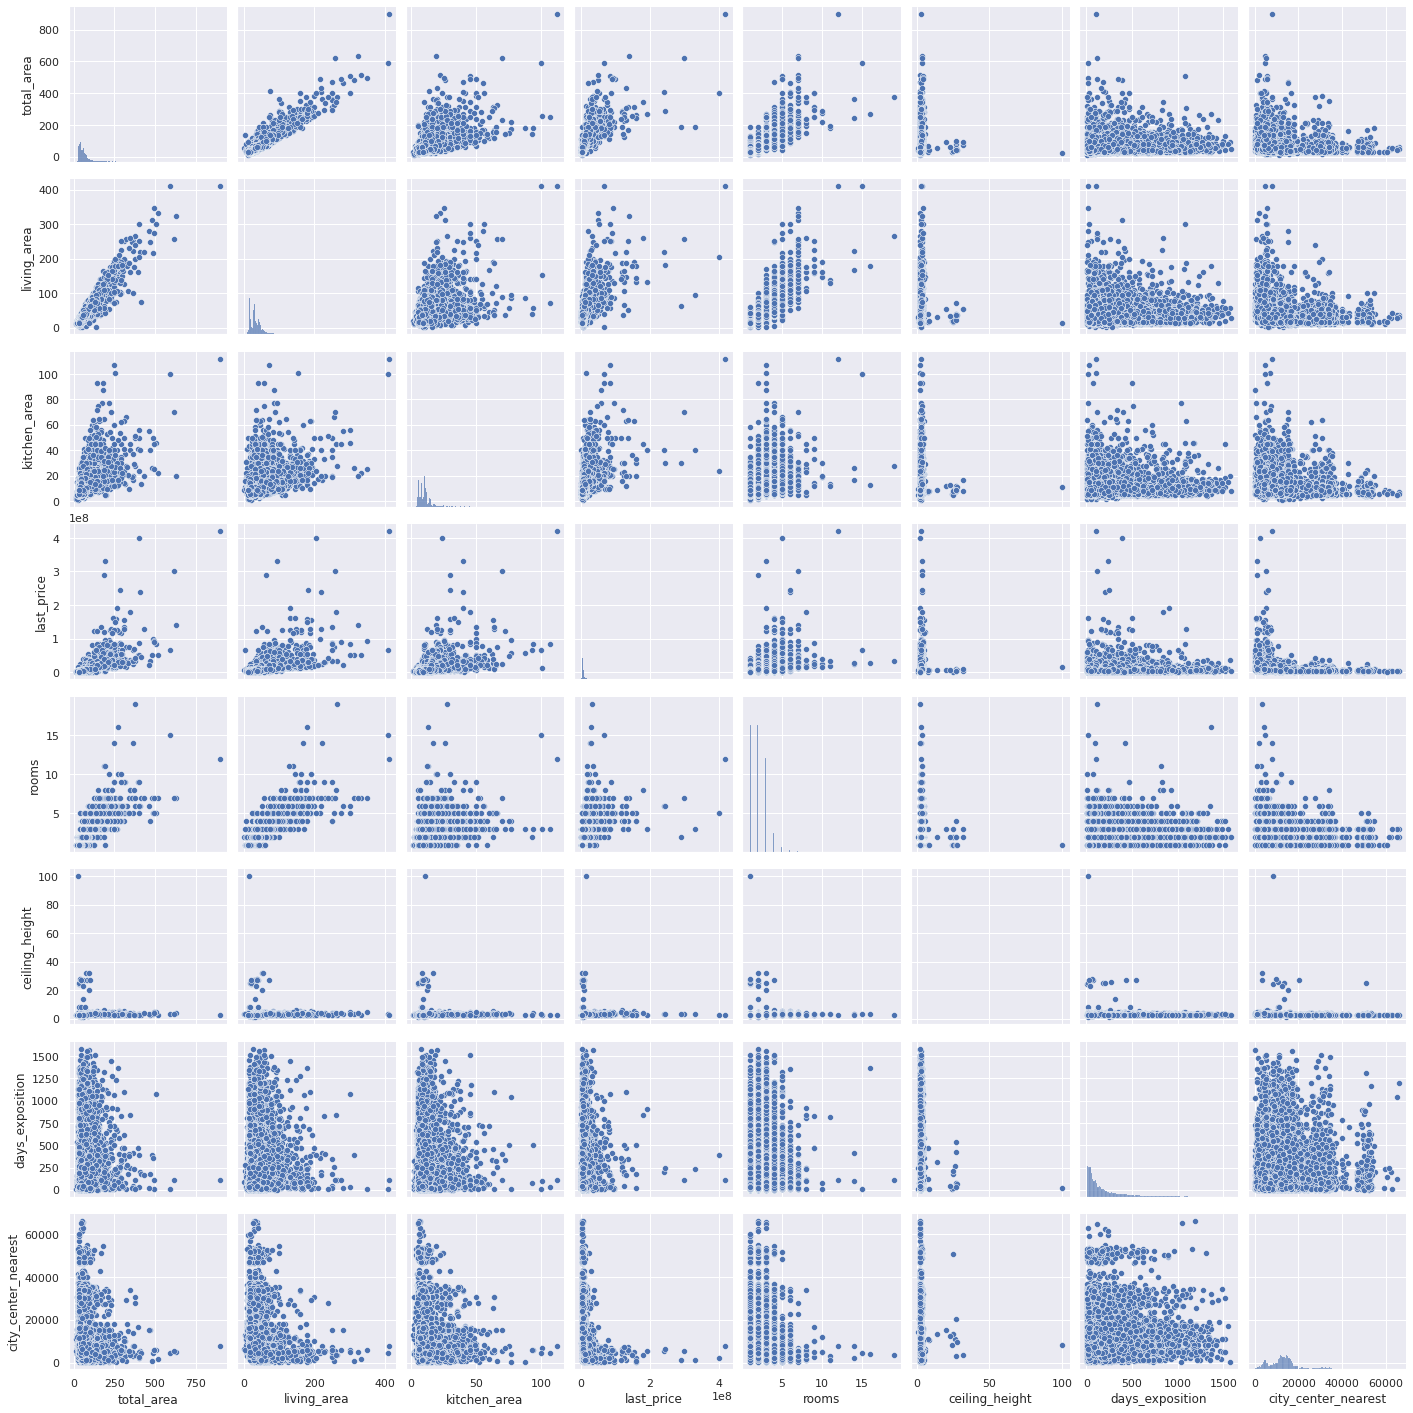

In [270]:
sns.pairplot(data=df[['total_area', 'living_area', 'kitchen_area', 
                                'last_price', 'rooms', 'ceiling_height', 
                                'days_exposition', 'city_center_nearest']]);

Удалим записи с высотой потолков более 3 метров или менее 2,3 метра.

In [271]:
df_filtered = df.query('ceiling_height <= 3 and ceiling_height >= 2.3')

Рассмотрим матрицу на отфильтрованных данных.

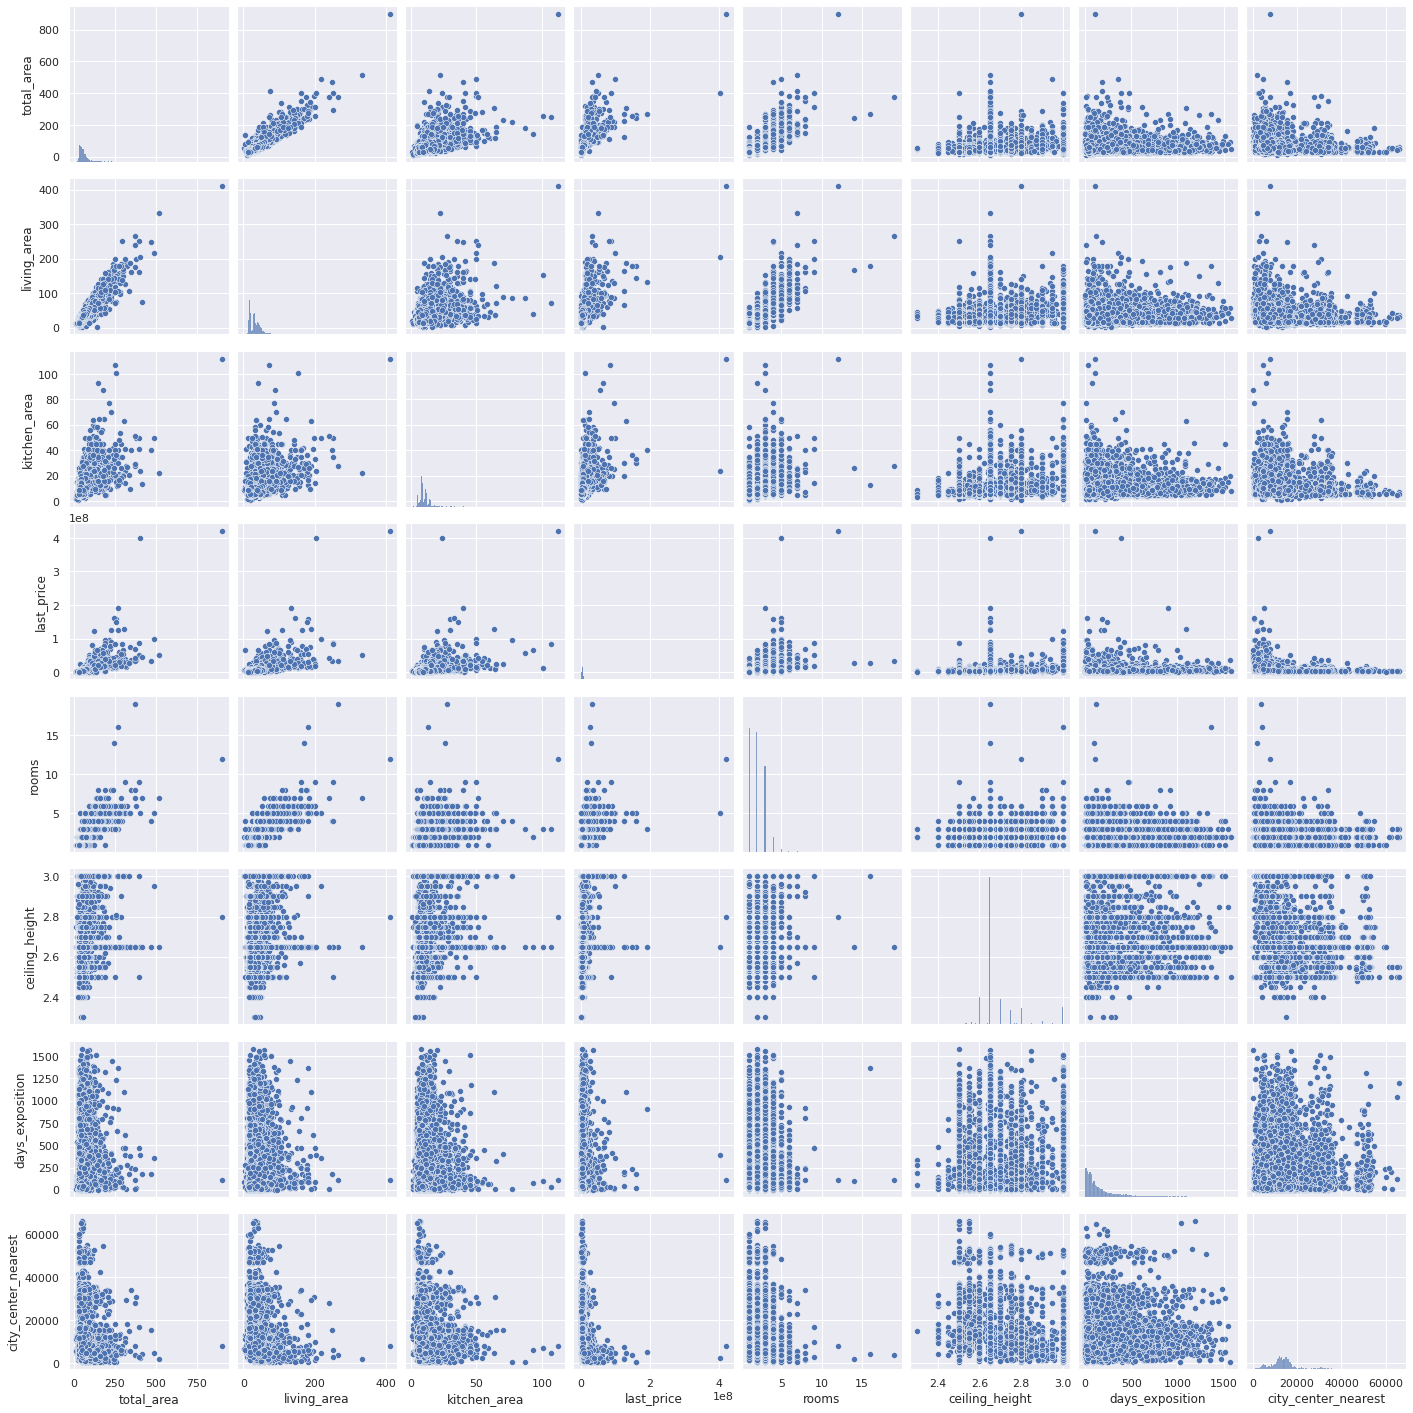

In [272]:
sns.pairplot(data=df_filtered[['total_area', 'living_area', 'kitchen_area', 
                                'last_price', 'rooms', 'ceiling_height', 
                                'days_exposition', 'city_center_nearest']]);

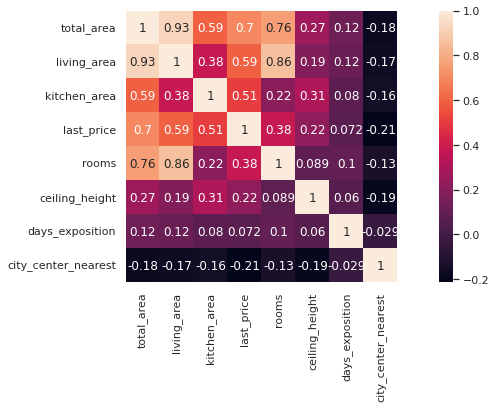

In [273]:
corr = df_filtered[['total_area', 'living_area', 'kitchen_area', 
                                'last_price', 'rooms', 'ceiling_height', 
                                'days_exposition', 'city_center_nearest']].corr()
sns.heatmap(corr, square=True, annot=True);

После удаления редких и выбивающихся значений видна корреляция жилой и общей площади. Корреляция площади кухни и общей площади менее выражена. Также видна корреляция цены и общей площади, цены и жилой площади.

### Исследование факторов, влияющих на цену

Рассмотрим, какие факторы больше всего влияют на стоимость квартиры. 

#### Площадь, число комнат, удалённость от центра

In [274]:
print('Коэффициент корреляции между ценой и общей площадью:', 
      df_filtered['last_price'].corr(df_filtered['total_area']))
print('Коэффициент корреляции между ценой и расстоянием до центра:', 
      df_filtered['last_price']\
      .corr(df_filtered['city_center_nearest']))

df_filtered.groupby('rooms').agg({'last_price': ['count', 'median']})

Коэффициент корреляции между ценой и общей площадью: 0.6970044400648064
Коэффициент корреляции между ценой и расстоянием до центра: -0.2135605404316251


last_price             
           count       median
rooms                        
1           6942    3600000.0
2           6734    4690000.0
3           4798    5950000.0
4            846    8270000.0
5            169   13000000.0
6             51   17000000.0
7             18   20750000.0
8              6   19345000.0
9              3   49968900.0
12             1  420000000.0
14             1   28659000.0
16             1   28500000.0
19             1   32250000.0

Вывод: цена сильно зависит от общей площади продаваемой квартиры. Наблюдается слабая обратная корреляция между ценой квартиры и расстоянием от центра города. Наблюдается зависимость медианной цены продажи квартиры от количества комнат: чем комнат больше, тем больше и медианная цена продажи квартиры.

При числе комнат более 7 данная зависимость не наблюдается, но и выборка подобных объявлений слишком мала, чтобы по ней можно было делать обоснованыне выводы. 

#### Этаж квартиры

In [275]:
df_filtered.groupby('floor_category').agg({'last_price': ['count', 'median']})

last_price           
                    count     median
floor_category                      
другой              14434  4700000.0
первый               2413  3880000.0
последний            2724  4150000.0

Вывод: цена продажи зависит от этажа квартиры. Медианные значения цены продажи квартир, расположенных на первом и последнем этажах, ниже, чем медианное значение цены квартир, расположенных на других этажах.

#### Средняя цена квадратного метра в зависимости от населённого пункта

Определим 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в них. Выделим среди них пункты с самой высокой и самой низкой стоимостью жилья.

In [276]:
# группируем по населённому пункту
locality_mean_price = df_filtered.groupby('locality_name').agg({'sq_meter_price': ['count', 'mean']})
# меняем название колонок на более информативные
locality_mean_price.columns = ['qty_of_ads', 'mean_sq_meter_price']
# сортируем
locality_mean_price = locality_mean_price.sort_values(by='qty_of_ads', ascending=False)
print('Десять населённых пунктов с самым большим количеством объявлений и средняя цена квадратного метра:')
locality_mean_price['mean_sq_meter_price'].head(10).to_frame()

Десять населённых пунктов с самым большим количеством объявлений и средняя цена квадратного метра:


,mean_sq_meter_price
locality_name,
Санкт-Петербург,110857.427223
поселок Мурино,85412.816205
поселок Шушары,78509.901147
Всеволожск,69105.954616
Пушкин,102329.081542
Колпино,75266.872744
поселок Парголово,90756.003417
Гатчина,68498.958979
деревня Кудрово,92248.477506


In [277]:
print('Населённый пункт с самой высокой средней стоимостью квадратного метра:',
     locality_mean_price['mean_sq_meter_price'].head(10).idxmax())
print('Населённый пункт с самой низкой средней стоимостью квадратного метра:',
     locality_mean_price['mean_sq_meter_price'].head(10).idxmin())

Населённый пункт с самой высокой средней стоимостью квадратного метра: Санкт-Петербург
Населённый пункт с самой низкой средней стоимостью квадратного метра: Гатчина


#### Определение центральной зоны Санкт-Петербурга

Выделим объявления, относящиеся к Санкт-Петербургу, сгруппируем их по расстоянию от центра и посчитаем среднюю цену квадратного метра для каждого километра. Построим график зависимости средней цены от расстояния до центра города.

In [278]:
st_peter = df_filtered.query('locality_name == "Санкт-Петербург"')
# убираем значения с пропусками, с ними не работает операция приведения к целочисленному типу
st_peter = st_peter.dropna(subset=['city_center_nearest'])
st_peter['center_distance_km'] = (st_peter['city_center_nearest'] / 1000).astype('int64')
# контроль
st_peter.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_category,living_to_total_rate,kitchen_to_total_rate,center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,16
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214,13
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557,15
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,553.0,137.0,127525.252525,3,11,2017,другой,0.512626,0.214646,13
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,296.0,19.0,119230.769231,5,11,2017,другой,0.525641,0.194872,14


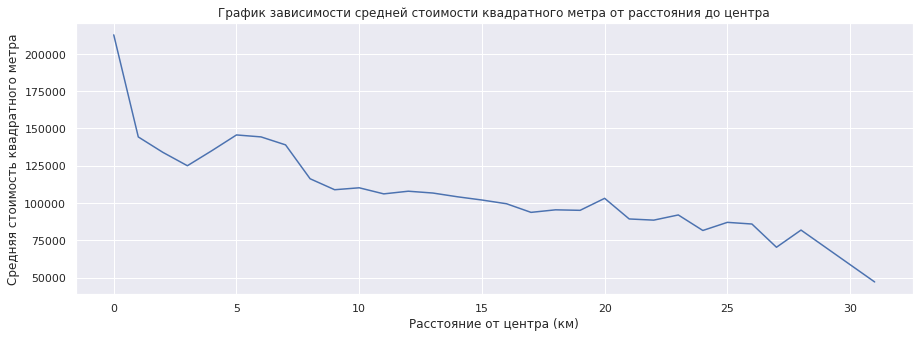

In [279]:
sns.lineplot(data=st_peter.groupby('center_distance_km').agg({'sq_meter_price': 'mean'}),
             legend=False)\
.set(xlabel='Расстояние от центра (км)',
     ylabel='Средняя стоимость квадратного метра',
     title='График зависимости средней стоимости квадратного метра от расстояния до центра');

Из построенного графика видно, что на удалении в примерно 7 км от центра города средняя цена квадратного метра резко падает. Можно предположить, что центральная зона Санкт-Петербурга расположена именно в пределах круга с радиусом 7 км.

#### Исследование ценообразования в центральной зоне Санкт-Петербурга

##### Общая площадь, стоимость, количество комнат, высота полока

В предыдущем параграфе мы определелили, что центральная зона Санкт-Петербурга находится в пределах 7 км от его центра. Рассмотрим данные, относящиеся к этой зоне, подробнее.

In [280]:
city_center = st_peter.query('center_distance_km <= 7')

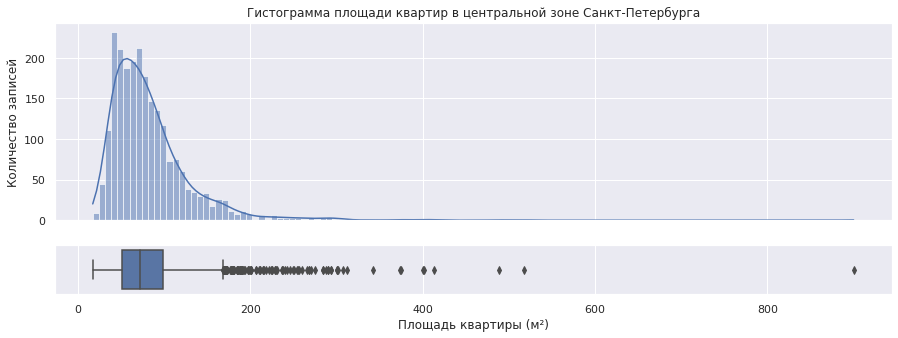

In [281]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=city_center, x='total_area', kde=True, ax=axs_hist)\
.set(title='Гистограмма площади квартир в центральной зоне Санкт-Петербурга',
     ylabel='Количество записей')
sns.boxplot(data=city_center, x='total_area', ax=axs_box)\
.set(xlabel='Площадь квартиры (м²)');

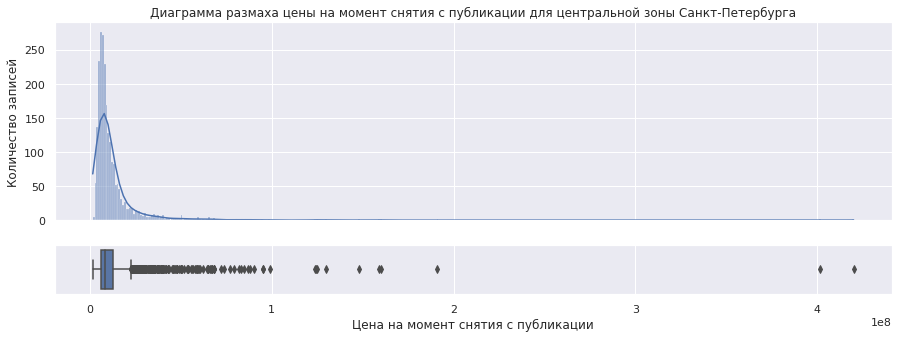

In [282]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=city_center, x='last_price', kde=True, ax=axs_hist)\
.set(title='Диаграмма размаха цены на момент снятия с публикации для центральной зоны Санкт-Петербурга',
     ylabel='Количество записей')
sns.boxplot(data=city_center, x='last_price', ax=axs_box)\
.set(xlabel='Цена на момент снятия с публикации');

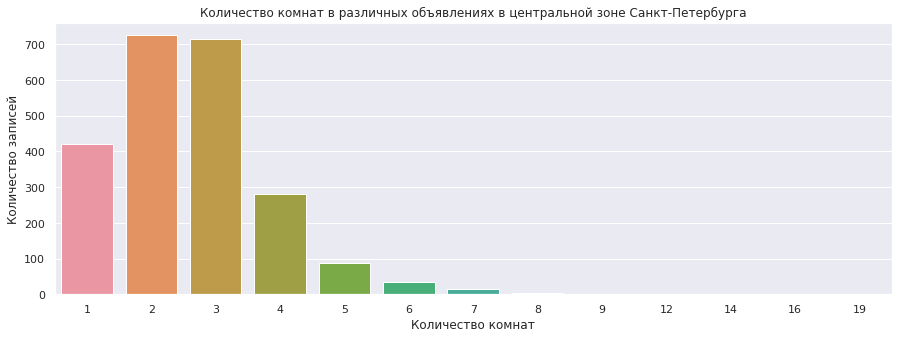

In [283]:
sns.countplot(data=city_center, x='rooms')\
.set(xlabel='Количество комнат',
     ylabel='Количество записей',
     title='Количество комнат в различных объявлениях в центральной зоне Санкт-Петербурга');

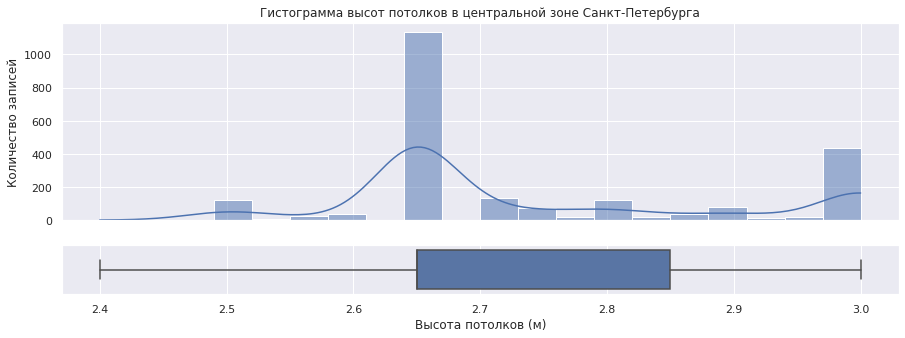

In [284]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=city_center, x='ceiling_height', discrete=False,
             kde=True, ax=axs_hist)\
.set(title='Гистограмма высот потолков в центральной зоне Санкт-Петербурга',
     ylabel='Количество записей')
sns.boxplot(data=city_center, x='ceiling_height', ax=axs_box)\
.set(xlabel='Высота потолков (м)');

In [285]:
city_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,2286.000000,2.286000e+03,2286.000000,2286.000000
mean,82.955647,1.256784e+07,2.621610,2.738618
std,50.056404,1.792754e+07,1.332918,0.151476
min,17.000000,1.600000e+06,1.000000,2.400000
25%,51.000000,6.200000e+06,2.000000,2.650000
50%,71.700000,8.434000e+06,2.000000,2.650000
75%,97.975000,1.283691e+07,3.000000,2.850000
max,900.000000,4.200000e+08,19.000000,3.000000


Видно, что в объявлениях, относящихся к центральной зоне Санкт-Петербурга, большая часть квартир имеет общую площадь до 97 квадратных метров. Медианная цена продаваемой квартиры — около 8.400.000. Большая часть кватир имеет до трёх комнат. Медианная высота потолка - 2,65 метра.

##### Факторы, влияющие на среднюю стоимость квадратного метра

Оценим факторы, влияющие на стоимость квартиры в центральной зоне Санкт-Петербурга.

In [286]:
print('Оценка влияния количества комнат на среднюю стоимость квадратного метра (центральная зона):')
city_center.groupby('rooms').agg({'sq_meter_price': ['count', 'mean']})


Оценка влияния количества комнат на среднюю стоимость квадратного метра (центральная зона):


sq_meter_price               
               count           mean
rooms                              
1                421  145931.513309
2                724  134856.983204
3                713  136969.506047
4                281  145640.985646
5                 87  155029.488132
6                 34  136534.347239
7                 16  115647.262877
8                  5  108906.971893
9                  1  220000.000000
12                 1  466666.666667
14                 1  116784.841076
16                 1  105555.555556
19                 1   86091.831287

Видно, что количество комнат влияет на среднюю стоимость квадратного метра. Чем больше комнат, тем ниже медианная стоимость квадратного метра. При выявлении данной зависимости рассматривались только объявления с количеством комнат менее 7, так как данных об объявлениях с большим количеством комнат слишком мало.

Посмотрим, наблюдается ли подобная зависимость во всём Санкт-Петербурге.

In [287]:
print('Оценка влияния количества комнат на среднюю стоимость квадратного метра (Санкт-Петербург):')
st_peter.groupby('rooms').agg({'sq_meter_price': ['count', 'mean']})

Оценка влияния количества комнат на среднюю стоимость квадратного метра (Санкт-Петербург):


sq_meter_price               
               count           mean
rooms                              
1               4248  114242.500360
2               4302  109233.643897
3               3347  106150.366806
4                672  116212.496192
5                141  134260.507881
6                 45  126554.618407
7                 17  113387.649785
8                  5  108906.971893
9                  3  136171.386288
12                 1  466666.666667
14                 1  116784.841076
16                 1  105555.555556
19                 1   86091.831287

Вывод: в центральной зоне средняя стоимость квадратного метра падает с увеличеним числа комнат. Аналогичная зависимость наблюдается по всему Санкт-Петербургу.

In [288]:
print('Оценка влияния этажа на среднюю стоимость квадратного метра (центральная зона):')
display(city_center.groupby('floor_category').agg({'sq_meter_price': ['count', 'mean']}))
print('Оценка влияния этажа на среднюю стоимость квадратного метра (Санкт-Петербург):')
display(st_peter.groupby('floor_category').agg({'sq_meter_price': ['count', 'mean']}))

Оценка влияния этажа на среднюю стоимость квадратного метра (центральная зона):


sq_meter_price               
                        count           mean
floor_category                              
другой                   1628  144490.085363
первый                    266  116341.150801
последний                 392  135206.928243

Оценка влияния этажа на среднюю стоимость квадратного метра (Санкт-Петербург):


sq_meter_price               
                        count           mean
floor_category                              
другой                   9975  112830.495093
первый                   1301   97388.265046
последний                1508  109217.810833

Вывод: в центральной зоне средняя стоимость квадратного метра на первом и последнем этаже ниже, чем на других этажах. Аналогичная зависимость наблюдается во всём Санкт-Петербурге.

In [289]:
print('Оценка влияния удалённости от центра на среднюю стоимость квадратного метра (центральная зона):')
display(city_center.groupby('center_distance_km').agg({'sq_meter_price': ['count', 'mean']}))

Оценка влияния удалённости от центра на среднюю стоимость квадратного метра (центральная зона):


sq_meter_price               
                            count           mean
center_distance_km                              
0                              39  212799.312167
1                             121  144318.263319
2                             136  133993.507009
3                             302  125002.446374
4                             548  135128.311959
5                             480  145652.593240
6                             326  144342.596764
7                             334  138990.826068

Вывод: в отличие от данных по всему Санкт-Петербургу, в центральной зоне нет ярко выраженной зависимости средней стоимости квадратного метра жилья от расстояния от центра.

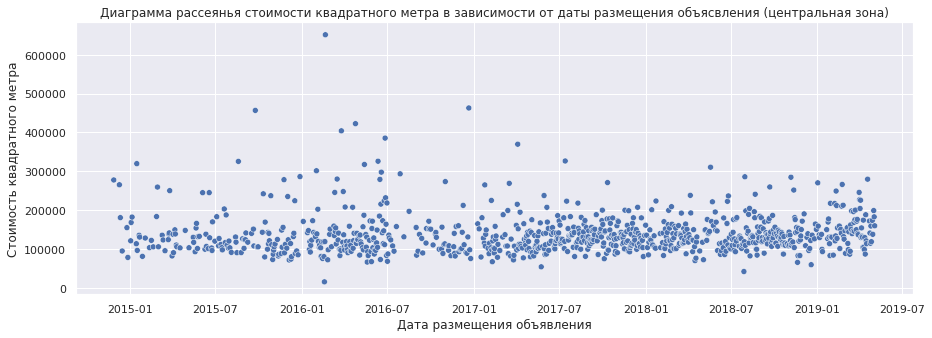

In [290]:
sns.scatterplot(data=city_center.groupby('first_day_exposition')\
                .agg({'sq_meter_price': 'mean'}),
                legend=False)\
.set(title='Диаграмма рассеянья стоимости квадратного метра в зависимости от даты размещения объясвления (центральная зона)',
     xlabel='Дата размещения объявления',
     ylabel='Стоимость квадратного метра');

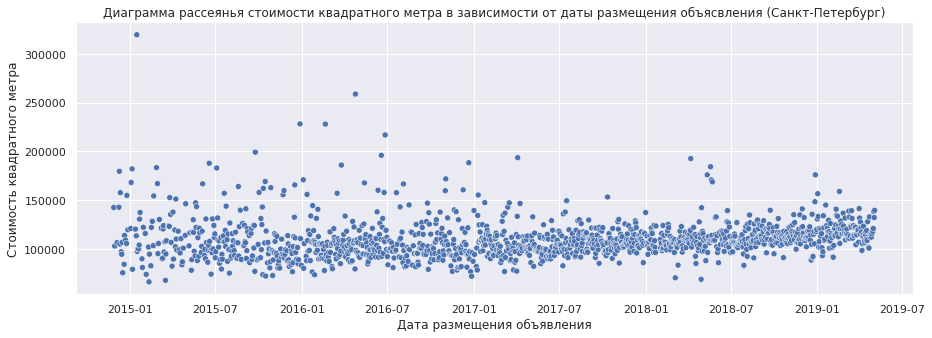

In [291]:
sns.scatterplot(data=st_peter.groupby('first_day_exposition')\
                .agg({'sq_meter_price': 'mean'}),
                legend=False)\
.set(title='Диаграмма рассеянья стоимости квадратного метра в зависимости от даты размещения объясвления (Санкт-Петербург)',
     xlabel='Дата размещения объявления',
     ylabel='Стоимость квадратного метра');

Вывод: в центральной зоне Санкт-Петербурга, как и в остальном городе, не наблюдается зависимости средней стоимости квадратного метра от даты размещения объявления.

## Общий вывод

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Данные были обработаны и очищены от выбросов. 

В результате анализа данных было выявлено, что:
* медианное время продажи квартиры составляет примерно 100 дней;
* на цену квартиры оказывает значительное влияние её площадь;
* по мере удаления от центра города средняя стоимость квартиры снижается;
* средняя стоимость квадратного метра на первом и последнем этажах ниже, чем на других этажах;
* центральная зона Санкт-Петербурга (зона с наиболее высокой средней ценой квадратного метра) находится в пределах 7 км от центра города;
* в центральной зоне ценообразование зависит от тех же факторов, что и в остальном городе, но в ней не наблюдается стольже ярковыраженной зависимости средней стоимости квадратного метра от расстояния до центра города;
* на рассматриваемом временном промежутке средняя стоимость квадратного метра не зависит от даты публикации объявления.